In [36]:
# import used libraries
import pandas as pd                        # pandas for data analysis
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt            # matplotlib for data visualisation
from scipy import stats  
import numpy as np

# Loading data 

In [3]:
DIR = "data/"

#read
S_TIMESERIES_PATH = DIR + "ent_timeseries_en.tsv.zip"
S_CHANNELS_PATH   = DIR + "ent_channels_en.tsv.zip"
S_METADATA_PATH   = DIR + "ent_metadata_en.tsv.zip"

In [4]:
s_timeseries = pd.read_csv(S_TIMESERIES_PATH)
s_timeseries.datetime = pd.to_datetime(s_timeseries.datetime)

s_channels   = pd.read_csv(S_CHANNELS_PATH)
s_channels.join_date = pd.to_datetime(s_channels.join_date)

s_metadata   = pd.read_csv(S_METADATA_PATH)
s_metadata.upload_date = pd.to_datetime(s_metadata.upload_date)

In [6]:
s_timeseries

,channel,datetime,views,delta_views,subs,delta_subs,videos,delta_videos,activity,evolution,has_buzzed
0,UC_k3BRoDOosVANkGzgPOW5g,2016-03-28,1.835155e+06,5433.241860,6536.851163,0.000000,111,0,0,0.000000,0
1,UC_k3BRoDOosVANkGzgPOW5g,2016-04-04,1.874842e+06,39686.288372,6732.981395,196.130233,111,0,0,0.029130,0
2,UC_k3BRoDOosVANkGzgPOW5g,2016-04-11,1.916769e+06,41927.469767,6919.250000,186.268605,111,0,0,0.026920,0
3,UC_k3BRoDOosVANkGzgPOW5g,2016-04-18,1.954370e+06,37601.000000,7049.500000,130.250000,111,0,0,0.018476,0
4,UC_k3BRoDOosVANkGzgPOW5g,2016-04-25,1.985741e+06,31371.222222,7143.111111,93.611111,111,0,0,0.013105,0
...,...,...,...,...,...,...,...,...,...,...,...
163671,UCsvSWMifNtM0t_s9fEJdlag,2019-09-02,2.323838e+06,3073.636364,10538.090909,0.000000,159,0,0,0.000000,0
163672,UCsvSWMifNtM0t_s9fEJdlag,2019-09-09,2.315400e+06,0.000000,10523.545455,0.000000,159,0,0,0.000000,0
163673,UCsvSWMifNtM0t_s9fEJdlag,2019-09-16,2.298329e+06,0.000000,10500.000000,0.000000,159,0,0,0.000000,0
163674,UCsvSWMifNtM0t_s9fEJdlag,2019-09-23,2.290509e+06,0.000000,10500.000000,0.000000,159,0,0,0.000000,0


In [7]:
s_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed
0,Entertainment,2013-05-03,UCMxtWuqP6Ktk1tsSZSstaug,Haryanvi Maina,8830000,1619,666.0,2.0870,9043.500000,0.043476,1
1,Entertainment,2006-02-27,UCDfk8ogO6QGeJAYCY0QDzKw,Stephen Sharer,7230000,549,867.0,2.0870,8843.000000,0.039752,1
2,Entertainment,2015-11-24,UCAgx4HcQIYn9lM0rhtIuH9w,HZHtube Kids Fun,6570000,358,914.0,2.0870,6100.000000,0.040441,1
3,Entertainment,2015-06-13,UCQcf-d098cNGGl3bPGGjHBg,OLIE THE CUB,6820000,778,941.0,2.0870,5181.000000,0.042452,1
4,Entertainment,2017-04-26,UC977n5nXRn8MDuGQjwxkOLw,PC Bob and Mr Bean: ...,6730000,3377,943.0,2.0870,6468.000000,0.051014,1
...,...,...,...,...,...,...,...,...,...,...,...
1253,Entertainment,2010-06-04,UCswGzcZ3DcBXN5Pc3J7d9Mg,BlaakowDancer,10200,65,977320.0,53.1435,7284.625000,0.001790,0
1254,Entertainment,2011-03-01,UChN6SlSBv21jbp6n1XRSbJA,thesongadayproject,10100,2624,977759.0,53.1435,9963.000000,0.000297,0
1255,Entertainment,2012-12-17,UCOioqCYGI_pOUWGGD1cMPCQ,Taylor Swift Brasil,10100,257,978347.0,53.1435,5840.744186,0.002987,0
1256,Entertainment,2013-12-27,UCQV1dyQqE8dtgWU6U_Rg0WQ,CrazySuperGamer,10300,38,978503.0,53.1435,9130.250000,0.000869,0


In [8]:
s_metadata

,channel,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count
0,UCztk4LFUIk4Ao4TCvpdnDsg,65.0,FQ_r9pGTLAs,415,3236.0,NaN,Bewafai | बेवफाई | بے وفائی,2019-09-20,45879.0
1,UCztk4LFUIk4Ao4TCvpdnDsg,43.0,5My0Au_MK18,190,3973.0,"خاموشی,#Khamoshi #Urdu #Syed #Jassim #Ali",خاموشی | Khamoshi Part 2...,2019-09-05,72677.0
2,UCztk4LFUIk4Ao4TCvpdnDsg,58.0,LoqwQLv0dzw,263,5106.0,#Khamoshi #Syed #Jassim #Ali #Narration #Motiv...,Khamoshi...,2019-08-29,101393.0
3,UCztk4LFUIk4Ao4TCvpdnDsg,13.0,1IvGSP_DXRE,487,458.0,NaN,Back Again...,2019-08-25,7019.0
4,UCztk4LFUIk4Ao4TCvpdnDsg,12.0,kP5qOBLhVc0,4559,467.0,NaN,Q & A,2019-08-25,6242.0
...,...,...,...,...,...,...,...,...,...
374947,UC-xONqXUrR4gvBUH6cntj7A,3.0,eo1H7Qb212Q,1752,71.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",New breech - The Ben Beech,2015-01-30,4233.0
374948,UC-xONqXUrR4gvBUH6cntj7A,5.0,mFpcCNgtni8,655,77.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",Boomco + Nerf,2015-01-19,5403.0
374949,UC-xONqXUrR4gvBUH6cntj7A,6.0,IhMuiMwLoSU,1060,140.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",OMW Retaliator Stage 3 Shotgun Pump Grip,2015-01-12,11860.0
374950,UC-xONqXUrR4gvBUH6cntj7A,2.0,6vLULc0LSd0,110,93.0,"pSyk,pSykSG,Nerf,NerfSG,Singapore,Foam,Dart,Bl...",Auto-Loading Clip-fed Nerf Rampage 3K (Final D...,2016-08-07,6535.0


In [11]:
#s_channels evo_score sorted
s_channels.sort_values(by=['evo_score'], inplace=True, ascending=False)
s_channels.head(10)
#s_channels evo_score and subscribers_cc sorted 
s_channels.sort_values(by=['evo_score', 'subscribers_cc'], inplace=True, ascending=False)
s_channels.head(30)

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed
630,Entertainment,2019-02-03,UCtXjVUXfl0vD_GFQHuupe5Q,LOVE MUSIC,18393,77,583678.0,6.6630,6587.200000,0.254397,1
340,Entertainment,2019-05-31,UCGS9evApv_T-ZZbSmHi4oBA,ALI's Tarot,49000,292,141099.0,5.3170,5028.294118,0.207858,1
413,Entertainment,2019-05-29,UCrK32JVzSVSmvG2H2fXIK2w,Britt Jokes,34800,32,238410.0,5.6755,5702.000000,0.188748,1
144,Entertainment,2018-07-19,UCNpl8LVL6YInh8w76w0AH8w,PhiloSophic,257000,10,35555.0,3.2475,8475.000000,0.186758,1
43,Entertainment,2019-04-01,UCtLigqC6teXDeSi2vWJUVVg,Maggie and Shanti,690000,45,11907.0,2.7070,5289.500000,0.157641,1
366,Entertainment,2019-04-24,UCSgd5WDsnVck5cTRgu6vgtg,「 lil peanda 」,85900,106,172423.0,4.0685,5999.812500,0.153406,1
411,Entertainment,2019-04-25,UCLQ8poLiAU01Zxa0-8Y5g8w,Chris P,36100,17,236015.0,4.4530,6095.090909,0.129918,1
341,Entertainment,2019-01-22,UCuLs5qdFVo-sn2NFIN5Vnxw,Birdie :3,83300,13,143147.0,4.7515,7969.785714,0.123164,1
501,Entertainment,2019-06-18,UC9j7GmXXf8LQWelFFoZu1Xw,ღÕrangeTulipღ,28163,30,414171.0,8.0655,7482.000000,0.120818,1
184,Entertainment,2019-03-12,UCA4srb08aAtJBvgfe9xRBRA,Lex & Tati,303000,50,46344.0,3.3170,5237.375000,0.116707,1


# Analysis parameter 
`numwords` = number of words in the title 

`is_capital_letter`= 1 if there is more than 2 words in capital letter in the title 

`feat`= 1 if the title contains a a word in the list of `featuring_wordsets`

`numtags`= the number of tags used in the video 

`count_words_simple`: function that count the number of word in the title 


In [112]:

def count_words_simple(string):
    return len(string.split(" "))

#num words in title
s_metadata['numwords'] = s_metadata["title"].apply(count_words_simple)
   
#capital letter
s_metadata['num_capital_letter'] =s_metadata["title"].apply(lambda x : sum(map(str.isupper, x.split())))
s_metadata['is_capital_letter']= 0
s_metadata['is_capital_letter'][s_metadata.num_capital_letter >= 2]=1


`is_in_string`: function that returns 1 if the `string` is in the `wordlist`

In [113]:
#featuring 
featuring_wordsets = list(('ft', 'ft.', 'feat.', 'featuring', 'with', 'collab',"w/"))

# is_in_string is a fuction returning 1 if a word from a wordlist is in a string, 0 otherwise
def is_in_string (string, wordlist):
    if any(word in string.lower().split(' ') for word in wordlist):
        return 1
    else :
        return 0

s_metadata['feat'] = s_metadata['title'].apply(is_in_string, args=[featuring_wordsets])

`count_tags`: function that count the number of tags used in the video

In [9]:
def count_tags(string):
    return len(str(string).split(","))

s_metadata['numtags'] = s_metadata["tags"].apply(count_tags)


We add the mean of `duration`, `numtags`etc by channel 


In [115]:
s_channels['mean_duration']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['duration'].mean()),on = 'channel')['duration']
s_channels['mean_numtags']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['numtags'].mean()),on = 'channel')['numtags']
s_channels['is_capital_letter']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['is_capital_letter'].mean()),on = 'channel')['is_capital_letter']
s_channels['numwords']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['numwords'].mean()),on = 'channel')['numwords']
s_channels['feat']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['feat'].mean()),on = 'channel')['feat']
s_channels['mean_views']= pd.merge(s_channels,pd.DataFrame(s_metadata.groupby('channel')['view_count'].mean()),on = 'channel')['view_count']


In [69]:
s_channels

,category_cc,join_date,channel,name_cc,subscribers_cc,videos_cc,subscriber_rank_sb,weights,initial_subs,evo_score,has_buzzed,mean_duration,mean_numtags,is_capital_letter,numwords,feat,mean_views
0,Entertainment,2013-05-03,UCMxtWuqP6Ktk1tsSZSstaug,Haryanvi Maina,8830000,1619,666.0,2.0870,9043.500000,0.043476,1,630.217228,12.590512,0.069913,16.205993,0.013733,3.537375e+05
1,Entertainment,2006-02-27,UCDfk8ogO6QGeJAYCY0QDzKw,Stephen Sharer,7230000,549,867.0,2.0870,8843.000000,0.039752,1,825.068966,29.108893,0.854809,7.845735,0.088929,5.320497e+06
2,Entertainment,2015-11-24,UCAgx4HcQIYn9lM0rhtIuH9w,HZHtube Kids Fun,6570000,358,914.0,2.0870,6100.000000,0.040441,1,401.008310,28.581717,0.074792,9.678670,0.299169,4.278963e+06
3,Entertainment,2015-06-13,UCQcf-d098cNGGl3bPGGjHBg,OLIE THE CUB,6820000,778,941.0,2.0870,5181.000000,0.042452,1,314.209512,13.001285,0.007712,11.470437,0.841902,2.829889e+06
4,Entertainment,2017-04-26,UC977n5nXRn8MDuGQjwxkOLw,PC Bob and Mr Bean: ...,6730000,3377,943.0,2.0870,6468.000000,0.051014,1,2777.799081,29.775191,0.236447,12.426340,0.011639,5.879031e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,Entertainment,2010-06-04,UCswGzcZ3DcBXN5Pc3J7d9Mg,BlaakowDancer,10200,65,977320.0,53.1435,7284.625000,0.001790,0,118.023810,2.000000,0.166667,11.119048,0.214286,8.433595e+03
1254,Entertainment,2011-03-01,UChN6SlSBv21jbp6n1XRSbJA,thesongadayproject,10100,2624,977759.0,53.1435,9963.000000,0.000297,0,247.880750,35.574106,0.024986,14.120386,0.014764,4.229425e+03
1255,Entertainment,2012-12-17,UCOioqCYGI_pOUWGGD1cMPCQ,Taylor Swift Brasil,10100,257,978347.0,53.1435,5840.744186,0.002987,0,192.078431,1.392157,0.196078,9.666667,0.019608,7.458627e+03
1256,Entertainment,2013-12-27,UCQV1dyQqE8dtgWU6U_Rg0WQ,CrazySuperGamer,10300,38,978503.0,53.1435,9130.250000,0.000869,0,1124.200000,1.500000,0.250000,7.100000,0.050000,9.552700e+03


# Random Forest

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = s_channels[['is_capital_letter','numwords','feat','mean_duration','mean_numtags']]
y = s_channels['has_buzzed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# view the classification report, which contains precision
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report)

,0,1,accuracy,macro avg,weighted avg
precision,0.688406,0.675439,0.68254,0.681922,0.682231
recall,0.719697,0.641667,0.68254,0.680682,0.682540
f1-score,0.703704,0.658120,0.68254,0.680912,0.681997
support,132.000000,120.000000,0.68254,252.000000,252.000000


# Importance of features 

In [80]:
import time
import numpy as np

start_time = time.time()
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.021 seconds


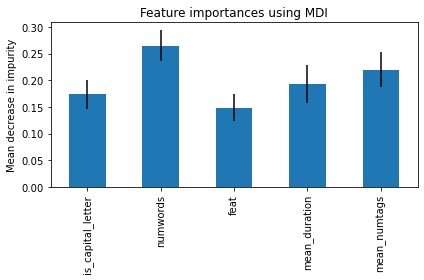

In [81]:
import pandas as pd

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# Linear regression 

In [78]:
import statsmodels.formula.api as smf
model = smf.ols(formula='mean_duration ~ C(has_buzzed)', data=s_channels)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:          mean_duration   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.947
Date:                Mon, 12 Dec 2022   Prob (F-statistic):             0.0863
Time:                        14:55:47   Log-Likelihood:                -10899.
No. Observations:                1258   AIC:                         2.180e+04
Df Residuals:                    1256   BIC:                         2.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            613.4562     55

# Most used tags 

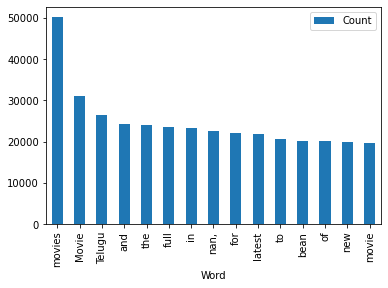

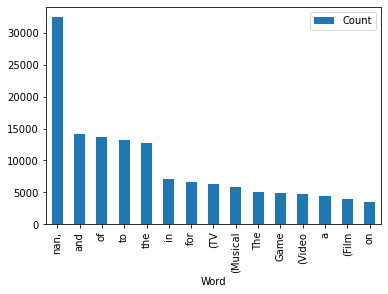

In [52]:
from collections import Counter
  
Buz_tags = buzzing_videos['tags'].tolist()
Nbuz_tags = not_buzzing_videos['tags'].tolist()
# split() returns list of all the words in the string
split_Buz = str(Buz_tags).split()
split_Nbuz = str(Nbuz_tags).split()
lst_buz = Counter(split_Buz).most_common(15)
lst_not_buz = Counter(split_Nbuz).most_common(15)
df_1 = pd.DataFrame(lst_buz, columns = ['Word', 'Count'])
df_2 = pd.DataFrame(lst_not_buz, columns = ['Word', 'Count'])
df_1.plot.bar(x='Word',y='Count')
df_2.plot.bar(x='Word',y='Count')
plt.show()

for i in s_metadata.channel.unique():
    

In [16]:
buzzing_channel = s_channels[s_channels['has_buzzed']==1]
not_buzzing_channel= s_channels[s_channels['has_buzzed']==0]

# Boxplot

<Figure size 720x504 with 0 Axes>

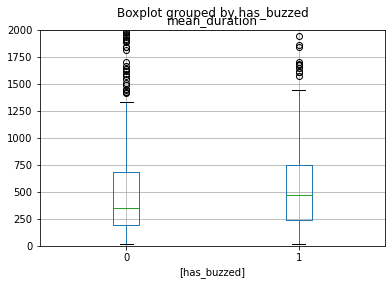

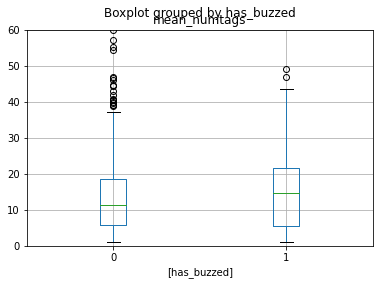

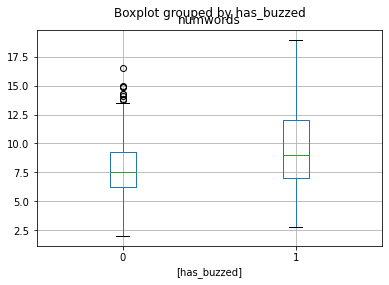

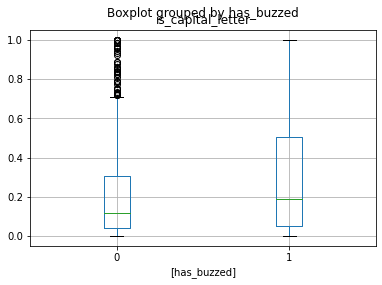

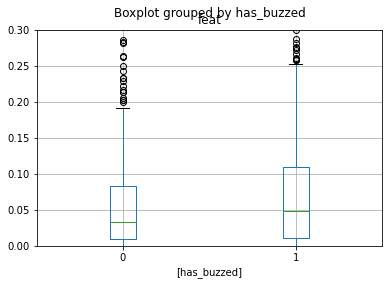

In [134]:
fig = plt.figure(figsize =(10, 7))

bp1 =s_channels.boxplot(column=['mean_duration'], by=['has_buzzed'])
plt.ylim([0,2000])
bp2 =s_channels.boxplot(column=['mean_numtags'], by=['has_buzzed'])
plt.ylim([0,60])
bp3 =s_channels.boxplot(column=['numwords'], by=['has_buzzed'])
bp4 =s_channels.boxplot(column=['is_capital_letter'], by=['has_buzzed'])
bp5 =s_channels.boxplot(column=['feat'], by=['has_buzzed'])
plt.ylim([0,0.3])
# show plot
plt.show()

# Lexical analysis on title 

In [ ]:
s_metadata['has_buzzed']= pd.merge(s_metadata,s_channels[['channel','has_buzzed']],on='channel')['has_buzzed']
buzzing_videos = s_metadata[s_metadata['has_buzzed']==1]
not_buzzing_videos= s_metadata[s_metadata['has_buzzed']==0]

In [33]:
# Analysis of the lexical fields


from empath import Empath 
import operator
import plotly.graph_objects as go
import networkx as nx
from collections import Counter
from itertools import chain

lexicon = Empath()


def mean_lexical(title):
    # returns a 1 x nbr_lexical_fields dataframe associating a mean lexical field score for the whole provided quote corpus
    
    lexical_fields_dict = lexicon.analyze(title.str.cat(sep = ' '), normalize = True) #by default, analyze all lexical fields from Empath

    return lexical_fields_dict

categories_df = []
categories_df.append(mean_lexical(buzzing_videos['title']))
categories_df.append(mean_lexical(not_buzzing_videos['title']))
categories_df = pd.DataFrame(categories_df, index = ['Buzzing','Not Buzzing']) 


In [ ]:
categories_df

,help,office,dance,money,wedding,domestic_work,sleep,medical_emergency,cold,hate,...,weapon,children,monster,ocean,giving,contentment,writing,rural,positive_emotion,musical
Buzzing,0.000147,0.000268,0.001516,0.000153,0.001581,0.001211,0.000100,0.000102,0.000146,0.000122,...,0.000139,0.001723,0.000064,0.000124,0.000192,0.000115,0.000146,0.000262,0.001596,0.001294
Not Buzzing,0.000142,0.000411,0.001056,0.000206,0.000289,0.000215,0.000092,0.000142,0.000183,0.000117,...,0.000288,0.000560,0.000065,0.000179,0.000238,0.000046,0.000230,0.000200,0.000420,0.000690


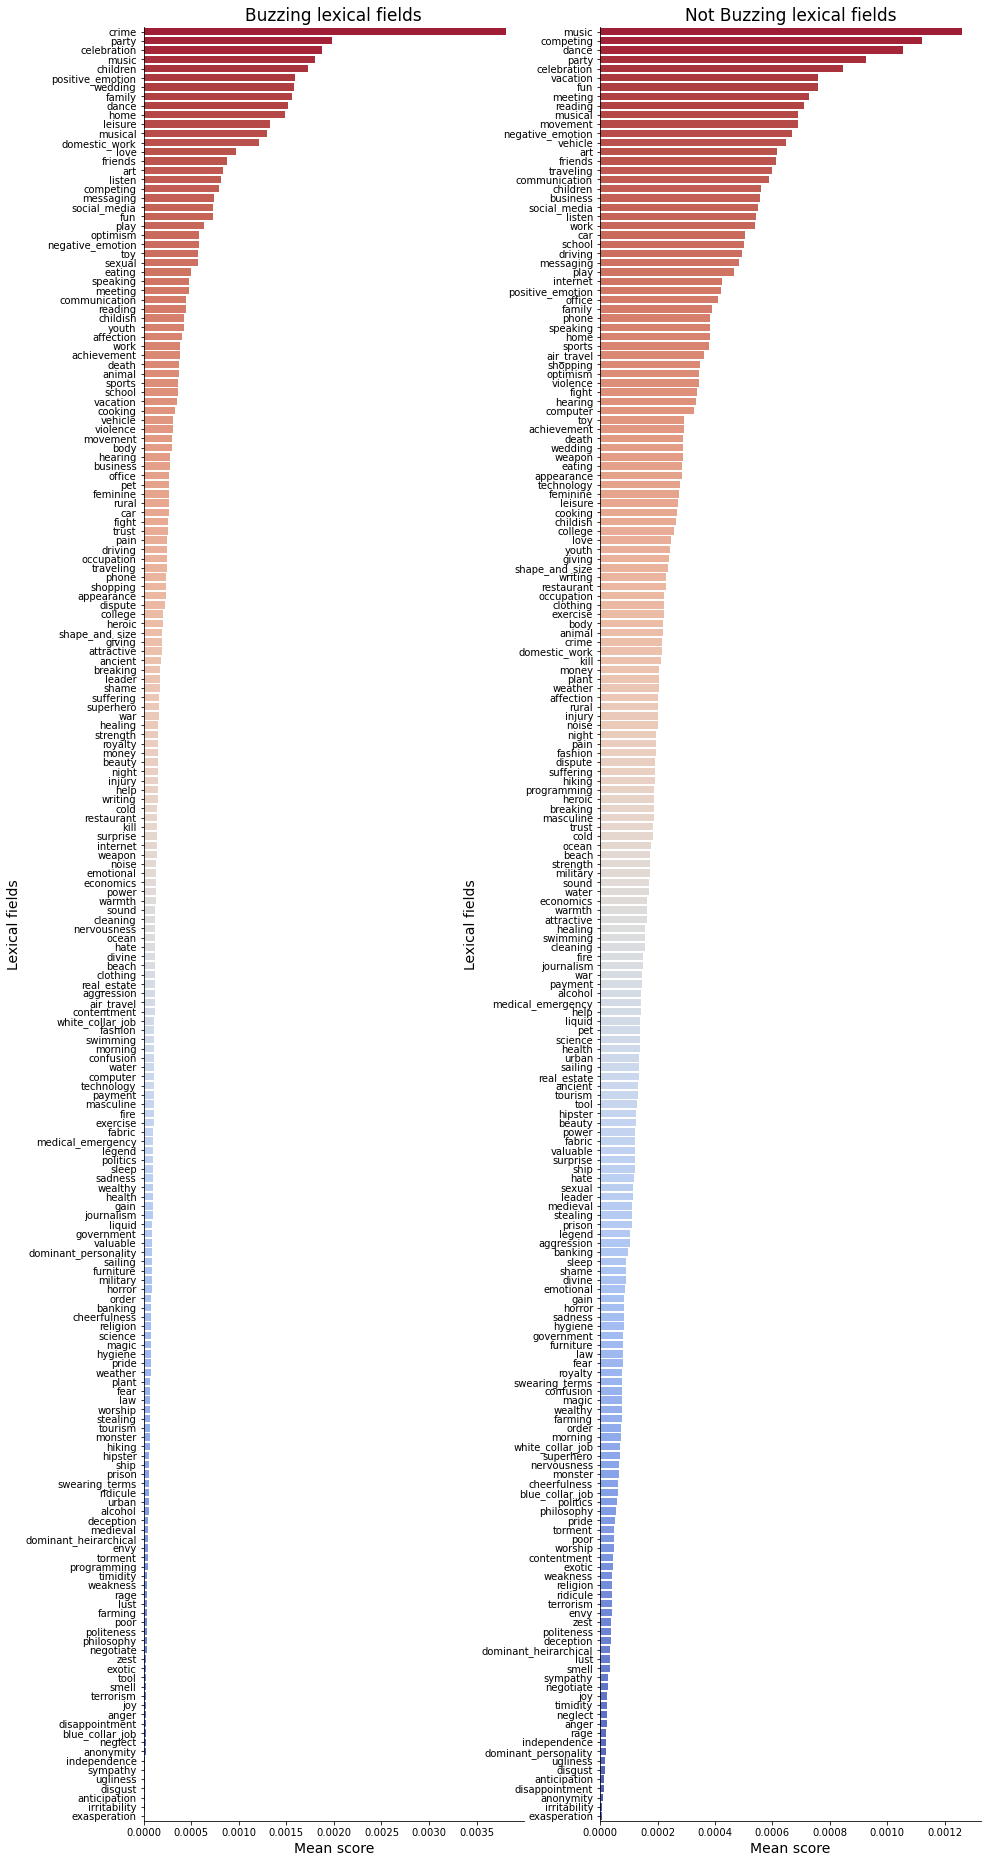

In [34]:
import seaborn as sns
temp_df = categories_df.copy().T 
temp_df.reset_index(inplace=True)

fig, ax = plt.subplots(1,2, figsize=(15, 33))

palette = sns.color_palette("coolwarm", n_colors = len(temp_df))
palette.reverse()

temp_df = temp_df.sort_values(by=['Buzzing'],  ascending=False)
sns.barplot(x = 'Buzzing', y = 'index', data=temp_df, ax = ax[0], palette = palette)
ax[0].set_title("Buzzing lexical fields", fontsize = 17)
ax[0].set_xlabel("Mean score", fontsize = 14)
ax[0].set_ylabel("Lexical fields", fontsize = 14)
ax[0].spines['right'].set_visible(False)
ax[0].spines['top'].set_visible(False)

temp_df = temp_df.sort_values(by=['Not Buzzing'],  ascending=False)
sns.barplot(x = 'Not Buzzing', y = 'index', data=temp_df, ax = ax[1], palette = palette)
ax[1].set_title("Not Buzzing lexical fields", fontsize = 17)
ax[1].set_xlabel("Mean score", fontsize = 14)
ax[1].set_ylabel("Lexical fields", fontsize = 14)
ax[1].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)

In [37]:
temp_df = categories_df.copy().T 
temp_df.reset_index(inplace=True)

#number of quotes to keep per category
N = 15

#we isolate the 15 most common lexical fields from our three categories:
temp_df = temp_df.sort_values(by=['Buzzing'],  ascending=False, ignore_index=True)
Buz_LFs = temp_df.loc[:N-1,'index'].values
temp_df = temp_df.sort_values(by=['Not Buzzing'],  ascending=False, ignore_index=True)
Nbuz_LFs = temp_df.loc[:N-1,'index'].values


#we remove dupplicates:
most_common_LFs = np.concatenate([Buz_LFs, Nbuz_LFs])
most_common_LFs = np.array(most_common_LFs).ravel()
most_common_LFs = np.unique(most_common_LFs)

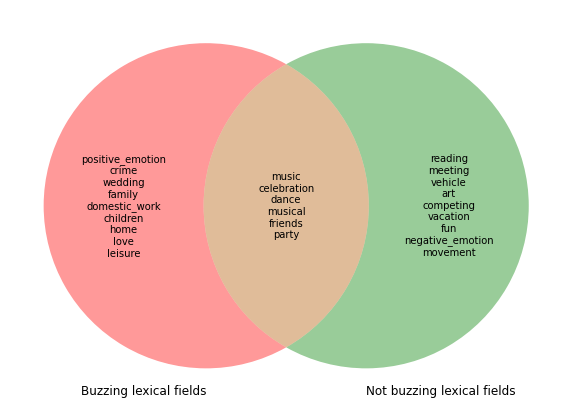

In [44]:
#Venn diagram
from matplotlib_venn import venn2
A = set(Buz_LFs)
B = set(Nbuz_LFs)

fig, ax = plt.subplots(1,1, figsize=(10, 10))

v = venn2([A, B], ('Buzzing lexical fields', "Not buzzing lexical fields"))

v.get_label_by_id('11').set_text('\n'.join(A&B))
v.get_label_by_id('10').set_text('\n'.join(A-B))
v.get_label_by_id('01').set_text('\n'.join(B-A))

In [1]:
test_ludo = 2

In [ ]:
coucou = s_metadata[s_metadata['has_buzzed']==1]